<a href="https://colab.research.google.com/github/yaroslavtsepkov/colab/blob/lab_0/Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Matrix multiplication
### CPU (numpy) VS GPU(cupy)


In [364]:
import numpy as np
import cupy as cp
import time
import pandas as pd
import matplotlib.pyplot as plt

In [365]:
cp.cuda.Device()

<CUDA Device 0>

In [366]:
def genMatrix(n):
    return np.random.uniform(size=(n,n))

In [367]:
def cpuMult(n):
    size = []
    time_cpu = []
    while n < 2000:
        s = time.time()
        size.append(n)
        matrix = genMatrix(n)
        np.matmul(matrix, matrix)
        n += 50
        p = time.time()
        time_cpu.append(p-s)
    return size, time_cpu

In [368]:
def gpuMult(n):
    size = []
    time_gpu = []
    while n < 2000:
        s = time.time()
        size.append(n)
        matrix = cp.array(genMatrix(n))
        cp.matmul(matrix, matrix)
        n += 50
        p = time.time()
        time_gpu.append(p-s)
    return size, time_gpu

In [369]:
size_list_cpu, time_list_cpu = cpuMult(100)
size_list_gpu, time_list_gpu = gpuMult(100)
time_cpu = np.array(time_list_cpu)
time_gpu = np.array(time_list_gpu)

In [370]:
df = pd.DataFrame({
    'size_of_matrix': size_list_cpu,
    'time_for_CPU': time_cpu,
    'time_for_GPU': time_gpu,
    'boost': time_cpu / time_gpu
})
df

,size_of_matrix,time_for_CPU,time_for_GPU,boost
0,100,0.000923,0.002055,0.449408
1,150,0.000826,0.000751,1.100699
2,200,0.001547,0.000831,1.862514
3,250,0.002433,0.001218,1.997651
4,300,0.004402,0.001843,2.388486
5,350,0.004973,0.002227,2.233644
6,400,0.006806,0.003375,2.016458
7,450,0.008979,0.003618,2.481484
8,500,0.011733,0.004297,2.730249
9,550,0.014033,0.005205,2.696152


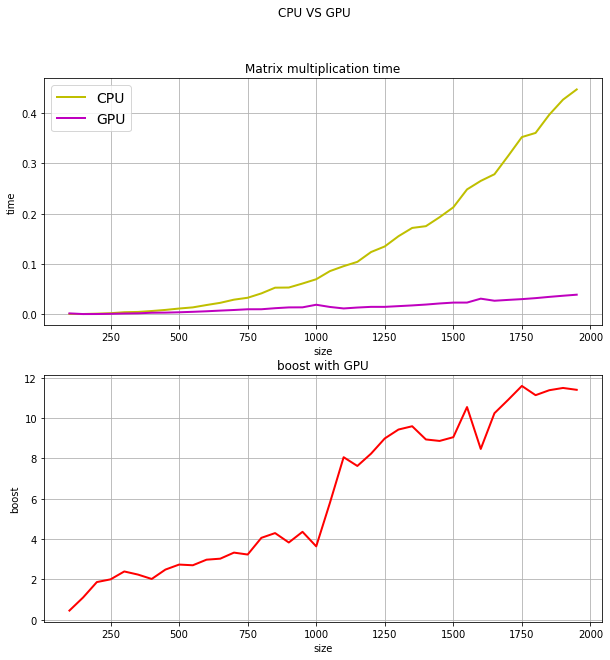

In [371]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
fig.suptitle('CPU VS GPU') 

ax1.plot(df.size_of_matrix, df.time_for_CPU, color='y', label = 'CPU', linewidth=2)
ax1.plot(df.size_of_matrix, df.time_for_GPU, color='m', label = 'GPU', linewidth=2)
ax1.legend(loc="upper left", fontsize=14)
ax1.set_xlabel('size')
ax1.set_ylabel('time')
ax1.set_title('Matrix multiplication time')
ax1.grid()

ax2.plot(df.size_of_matrix, df.boost, color='r', linewidth=2)
ax2.set_xlabel('size')
ax2.set_ylabel('boost')
ax2.set_title('boost with GPU')
ax2.grid()

plt.show()